<a href="https://colab.research.google.com/github/Mateusz-best-creator/Learning_ML/blob/main/Book_Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

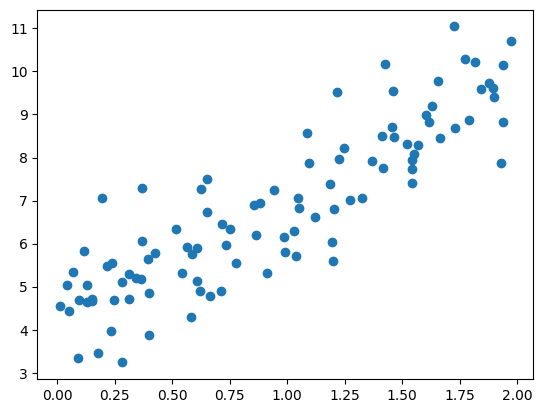

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

## Normal Equation

In [ ]:
from sklearn.preprocessing import add_dummy_feature
from scipy.linalg import inv

X_b = add_dummy_feature(X)
theta_best = inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = [[0], [2]]
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

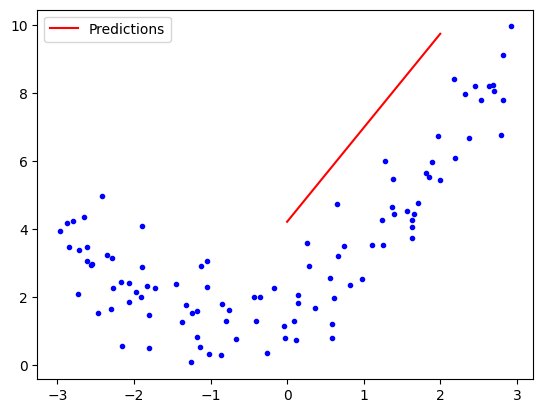

In [ ]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([[0.84362064]]), array([3.56401543]))

## Gradient Descent

### Batch Gradient Descent

In [ ]:
eta = 0.1
lr = 0.05
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.rand(2, 1)

for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - lr * gradients

print(f"Learned Parameters:\n{theta}")

Learned Parameters:
[[1.03315353]
 [2.5308619 ]]


### Stochastic Gradient Descent

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # Learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi) # For SGD do not divide by m!
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients

print(f"Learned Parameters:\n{theta}")

Learned Parameters:
[[0.97923723]
 [2.48630954]]


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,
                       tol=1e-5,
                       penalty=None,
                       eta0=0.01,
                       n_iter_no_change=100)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, tol=1e-05)

In [ ]:
sgd_reg.coef_, sgd_reg.intercept_

(array([0.84394957]), array([3.56579101]))

## Polynomial Regression

In [ ]:
X.ravel()

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816,
       -2.06403288, -2.65149833,  2.19705687,  0.60669007,  1.24843547,
       -2.87649303,  2.81945911,  1.99465584, -1.72596534, -1.9090502 ,
       -1.89957294, -1.17454654,  0.14853859, -0.40832989, -1.25262516,
        0.67111737, -2.16303684, -1.24713211, -0.80182894, -0.26358009,
        1.71105577, -1.80195731,  0.08540663,  0.55448741, -2.72129752,
        0.64526911, -1.97685526, -2.60969044,  2.69331322,  2.7937922 ,
        1.85038409, -1.17231738, -2.41396732,  1.10539816, -0.35908504,
       -2.26777059, -0.02893854, -2.79366887,  2.45592241, -1.44732011,
        0.97513371, -1.12973354,  0.12040813,  0.28026168, -1.89087327,
        2.81750777,  1.65079694,  2.63699365,  2.3689641 ,  0.58739987,
        2.53124541, -2.46904499, -1.82410283, -2.72863627, -1.04801802,
       -0.66793626, -1.37190581,  1.97242505, -0.85948004, -1.31439294,
        0.2561765 , -2.15445465,  1.81318188, -2.55269614,  2.92

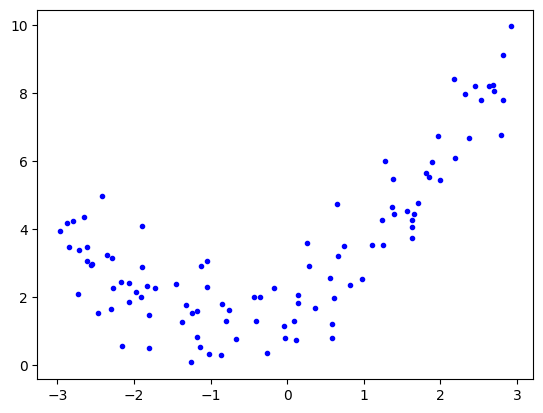

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.plot(X.ravel(), y.ravel(), 'b.');

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.93366893, 0.56456263]]), array([1.78134581]))

In [ ]:
X[:10]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547]])

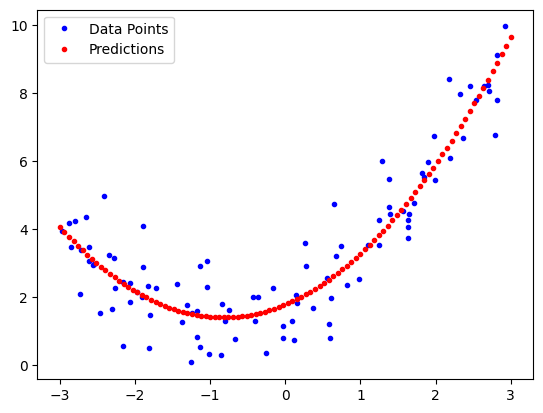

In [ ]:
x_predict = np.linspace(-3, 3, 100).reshape(-1, 1)
x_predict = poly_features.fit_transform(x_predict)
predictions = lin_reg.predict(x_predict)

np.random.seed(42)
plt.plot(X.ravel(), y.ravel(), 'b.', label="Data Points")
plt.plot(x_predict[:, 0], predictions, "r.", label="Predictions")
plt.legend()
plt.show()

## Learning Curves

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 73 instead of 100.
  warnings.warn(


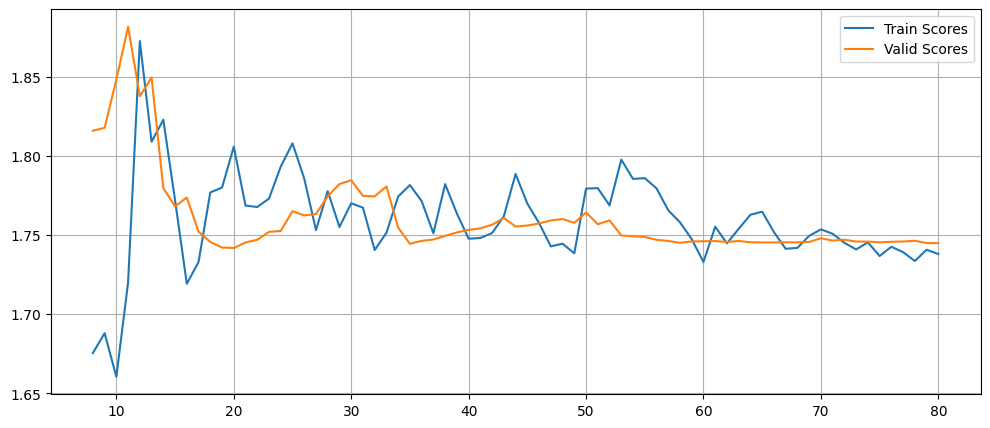

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(estimator=LinearRegression(),
                                                         X=X,
                                                         y=y,
                                                         train_sizes=np.linspace(0.1, 1.0, 100),
                                                         cv=5,
                                                         scoring="neg_root_mean_squared_error")
# Calculate means for every fold
train_error_mean = -train_scores.mean(axis=1)
valid_error_mean = -valid_scores.mean(axis=1)

plt.figure(figsize=(12, 5))
# Plot Learning Curves
plt.plot(train_sizes, train_error_mean, label="Train Scores")
plt.plot(train_sizes, valid_error_mean, label="Valid Scores")
plt.grid()
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 73 instead of 100.
  warnings.warn(


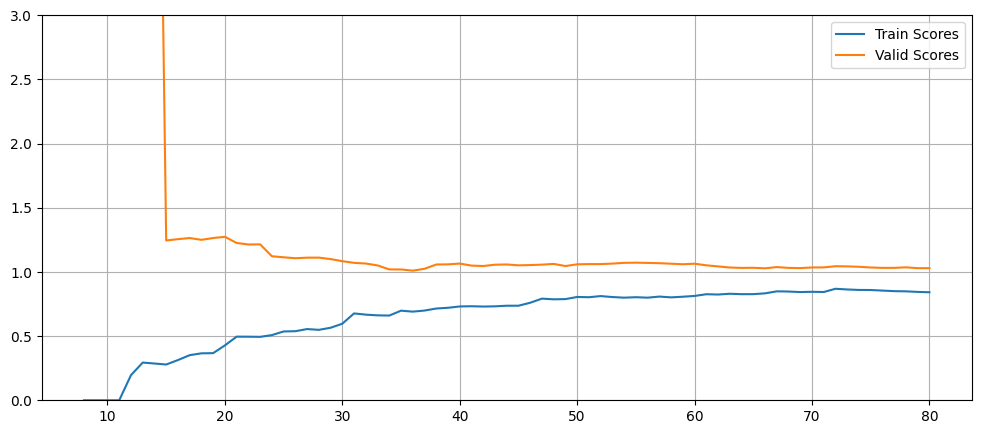

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False),
                                      LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(estimator=polynomial_regression,
                                                         X=X,
                                                         y=y,
                                                         train_sizes=np.linspace(0.1, 1.0, 100),
                                                         cv=5,
                                                         scoring="neg_root_mean_squared_error")
# Calculate means for every fold
train_error_mean = -train_scores.mean(axis=1)
valid_error_mean = -valid_scores.mean(axis=1)

plt.figure(figsize=(12, 5))
ax = plt.gca()
# Plot Learning Curves
plt.plot(train_sizes, train_error_mean, label="Train Scores")
plt.plot(train_sizes, valid_error_mean, label="Valid Scores")
plt.grid()
ax.set_ylim(0, 3)
plt.legend()
plt.show()

## Regularized Linear Models

### Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1,
                  solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82899748]])

In [ ]:
# Using SGD
sgd_reg = SGDRegressor(penalty="l2", alpha = 0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

### Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

en_reg = ElasticNet(alpha=0.1)
en_reg.fit(X, y)
en_reg.predict([[1.5]])

array([4.78114505])

## EarlyStopping

In [ ]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
preprocessing = make_pipeline(PolynomialFeatures(degree=10),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002)
n_epochs=500
best_valid_rmse = float('inf')

In [ ]:
for epoch in range(n_epochs):
  # Use Partial-fit here
  sgd_reg.partial_fit(X_train_prep, y_train.ravel())
  y_valid_predict = sgd_reg.predict(X_valid_prep)
  val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
  if val_error < best_valid_rmse:
    best_valid_rmse = val_error
    best_model = deepcopy(sgd_reg)

best_model.predict(preprocessing.transform([[1.5]]))

array([4.01961387])

## Logistic Regression

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_test

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, log_reg.predict(X_test))

1.0

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris.data[["petal width (cm)"]].values
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

softmax_reg = LogisticRegression()
softmax_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
accuracy_score(y_test, softmax_reg.predict(X_test))

0.9333333333333333